In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/SARIMA/GlobalTemperatures.csv"

--2024-12-10 14:20:20--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/SARIMA/GlobalTemperatures.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205875 (201K) [text/plain]
Saving to: ‘GlobalTemperatures.csv’

GlobalTemperatures. 100%[===================>] 201.05K  --.-KB/s    in 0.02s   

2024-12-10 14:20:20 (8.53 MB/s) - ‘GlobalTemperatures.csv’ saved [205875/205875]



In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('GlobalTemperatures.csv')

In [4]:
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
data['dt'] = pd.to_datetime(data['dt'])
data = data.set_index('dt')
data = data[['LandAverageTemperature']]
data = data.dropna()
data = data.resample('ME').mean()

In [7]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle = False)

In [8]:
data.isna().sum()

,0
LandAverageTemperature,12


In [9]:
train_data['LandAverageTemperature'] = train_data['LandAverageTemperature'].interpolate(method = 'time')

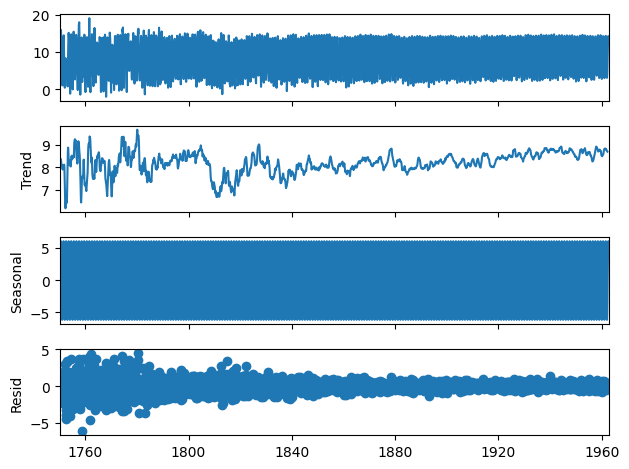

In [10]:
decomposition = seasonal_decompose(train_data, model = 'additive')
decomposition.plot()
plt.show()

In [11]:
model = SARIMAX(train_data, order = (1,1,1), seasonal_order = (1,1,1, 12))

In [12]:
sarima_model = model.fit(disp = False)

In [13]:
forecast = sarima_model.get_forecast(steps = len(test_data))
forecast_index = test_data.index
forecast_mean = forecast.predicted_mean
forecast_conf= forecast.conf_int()
forecast_conf.index = forecast_index

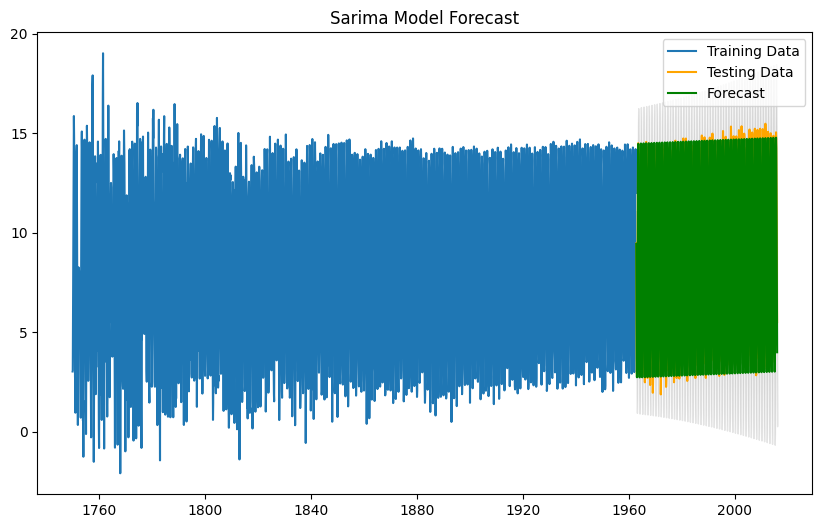

In [14]:
plt.figure(figsize = (10,6))
plt.plot(train_data.index, train_data, label = 'Training Data')
plt.plot(test_data.index, test_data, label = 'Testing Data', color = 'orange')
plt.plot(forecast_index, forecast_mean, label = 'Forecast', color = 'green')
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:,0], forecast_conf.iloc[:,1], color = 'grey', alpha = 0.2)
plt.title('Sarima Model Forecast')
plt.legend()
plt.show()

In [15]:
mae = mean_absolute_error(test_data, forecast_mean)
mse = mean_squared_error(test_data, forecast_mean)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.3804674206254968
Mean Squared Error: 0.22715334175314697
Root Mean Squared Error: 0.4766060655857697
